In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# EDA

In [41]:
df.shape

(918, 12)

In [42]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    str    
 2   ChestPainType   918 non-null    str    
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    str    
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    str    
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    str    
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), str(5)
memory usage: 86.2 KB


In [43]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [44]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [45]:
df.duplicated().sum()

np.int64(0)

In [46]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

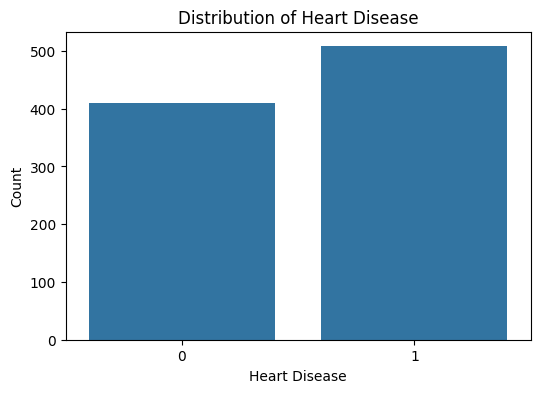

In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

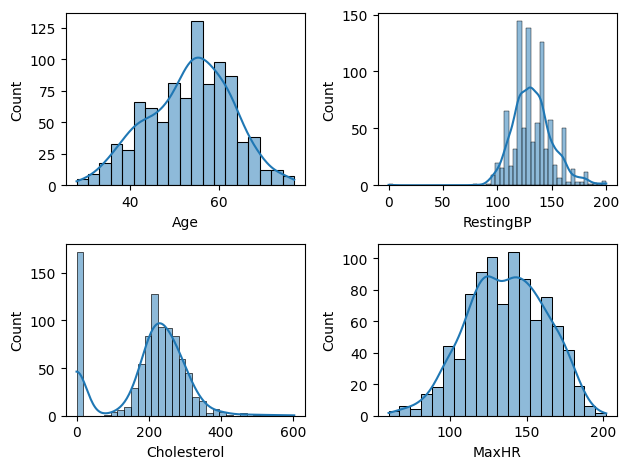

In [48]:
def plotting(var, num):
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde=True)

plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)
plt.tight_layout()
plt.show()

In [49]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
223     10
220     10
211      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [50]:
ch_mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()
ch_mean

np.float64(244.6353887399464)

In [51]:
df['Cholesterol'] = df['Cholesterol'].replace(0, ch_mean)
df['Cholesterol'] = df['Cholesterol'].round(2)

In [52]:
df['RestingBP'] = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()
df['RestingBP'] = df['RestingBP'].round(2)

In [53]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,132.54,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,132.54,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,132.54,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,132.54,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,132.54,195.0,0,Normal,122,N,0.0,Up,0
